In [1]:
import pandas as pd
import math
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import random
import json
tqdm.pandas()

In [3]:
# df.to_excel('data/eCommerce_behavior_data/2019-Oct.csv', index=False)
df = pd.read_csv('data/eCommerce_behavior_data/2019-Oct.csv', encoding = 'unicode_escape')
df = df[df['event_type'] == 'purchase']
df.dropna(inplace = True)
df.drop_duplicates(subset = ['event_type', 'product_id', 'user_session'], inplace=True)
df['category'] = df['category_code'].progress_apply(lambda x: x.split('.')[-1])
user_grouped = df.groupby('user_id')
filtered_data = pd.DataFrame()
for name, group in tqdm(user_grouped):
    try:
        subset = group.sample(20)
        subset['user_id'] = name
        filtered_data = pd.concat([filtered_data, subset])
    except:
        pass
del df
df = pd.DataFrame()
category_grouped = filtered_data.groupby('category')
for name, group in tqdm(category_grouped):
    if len(group)<10:
        continue
    group['category'] = name
    df = pd.concat([df, group])

100%|██████████| 90/90 [00:00<00:00, 267.25it/s]


In [ ]:
df = pd.read_csv('data/eCommerce_behavior_data/2019-Oct.csv', encoding = 'unicode_escape')
df.dropna(inplace = True)
df.drop_duplicates(subset = ['event_type', 'product_id', 'user_session'], inplace=True)

In [4]:
# filtered_data
# df['category'] = df['category_code'].progress_apply(lambda x: x.split('.')[-1])
print(df['category'].value_counts())

smartphone         15798
headphone            959
clocks               693
tv                   659
notebook             618
washer               505
tablet               322
refrigerators        315
vacuum               229
desktop              124
telephone            109
videocards            96
keds                  93
player                76
shoes                 75
kettle                69
monitor               64
alarm                 59
sewing_machine        56
microwave             55
oven                  54
iron                  49
printer               48
subwoofer             42
bicycle               40
videoregister         39
bed                   38
bag                   38
carriage              34
acoustic              34
motherboard           32
blender               32
drill                 29
mouse                 28
air_heater            28
saw                   27
skates                27
water_heater          26
photo                 25
toys                  25


In [10]:
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,category
22761697,2019-10-17 13:17:40 UTC,purchase,14100436,2053013557670314521,electronics.audio.acoustic,cortland,115.81,513429517,12bc4b75-fea7-474a-b635-2849cedf7fca,acoustic
1969621,2019-10-02 13:52:28 UTC,purchase,14100635,2053013557670314521,electronics.audio.acoustic,denn,38.07,513429517,e0b4fc24-1cfa-4b7a-b293-263058c158df,acoustic
3564395,2019-10-04 00:11:26 UTC,purchase,14100004,2053013557670314521,electronics.audio.acoustic,fender,180.96,513429517,7055f04f-ee29-4530-9546-edd6e6d7b156,acoustic
14700023,2019-10-12 07:04:08 UTC,purchase,14100411,2053013557670314521,electronics.audio.acoustic,yamaha,148.88,532766707,d78dc242-a245-458f-bc84-0efc68c6e08b,acoustic
39451709,2019-10-29 13:26:40 UTC,purchase,14100436,2053013557670314521,electronics.audio.acoustic,cortland,115.81,536969538,8e51fdcb-240e-4d1d-a19b-0d76aeebb0fe,acoustic
...,...,...,...,...,...,...,...,...,...,...
5249303,2019-10-05 06:17:10 UTC,purchase,30000074,2127425436764865054,construction.tools.welding,eurolux,97.56,513675734,d2181c9a-3b7d-4c30-adff-26432f7aea5f,welding
33793714,2019-10-25 08:41:54 UTC,purchase,30000070,2127425436764865054,construction.tools.welding,eurolux,78.51,513914118,6539e131-9086-41aa-a08f-2d6257298629,welding
10787907,2019-10-09 10:27:16 UTC,purchase,30000068,2127425436764865054,construction.tools.welding,eurolux,69.24,513914118,be9dca4e-5c92-488e-9fcf-81ccabdf79b0,welding
12356512,2019-10-10 14:38:21 UTC,purchase,30000070,2127425436764865054,construction.tools.welding,eurolux,78.64,533316379,a02459dc-fc6c-4138-bdaf-30156e6779dc,welding


In [9]:
def custom_round(num, digits = -1):
    return int(round(num, digits))

category_prices = {}
category_grouped_df = df.groupby('category')
for name, data in tqdm(category_grouped_df):
    prices = data['price'].values
    prices = sorted(list(set(map(custom_round, prices))))
    if len(prices)<20:
        continue
    if len(prices)>1000:
        prices = sorted(random.sample(prices, 1000))
    category_prices[name] = prices

100%|██████████| 124/124 [03:17<00:00,  1.59s/it]


In [15]:
# category_prices
# l = [1,2,3,4,5,6,7,8,9,10]
# random.sample(l, 5)

with open('processed_files/category_prices.json', 'w') as file:
    json.dump(category_prices, file)

len(category_prices)

86

In [41]:
import difflib
# difflib.get_close_matches('smartphne',category_prices.keys())
from fuzzywuzzy import process
# process.extractOne('smartphne', category_prices.keys())
from scipy.stats import percentileofscore
percentileofscore(category_prices['smartphone'], 2100)
# category_prices['smartphone']

99.47916666666667

In [82]:
import numpy as np
from fuzzywuzzy import process
from scipy.stats import percentileofscore

class PurchaseVectorizer:
    def __init__(self, category_prices, category_column = 'category', price_column = 'price', product_column = 'product_id'):
        self.category_prices = category_prices
        self.category_column = category_column
        self.price_column = price_column
        self.product_column = product_column
    
    def spell_rectifier(self, name):
        return process.extractOne(name, self.category_prices.keys())

    def get_category_prices(self, category_name):
        if category_name in self.category_prices:
            return self.category_prices[category_name]
        else:
            possible_category_name, score = self.spell_checker(category_name)
            if score<80:
                return []
            return self.category_prices[possible_category_name]
    
    
    def get_percentile_class(self, price, category_name):
        prices = self.get_category_prices(category_name)
        if prices == []:
            return -1
        percentile = percentileofscore(prices, price)

        if percentile<=25:
            return 0
        if percentile<=70:
            return 1
        return 2

    def data_to_vector(self, data):
        vector = np.zeros(3, dtype = int)
        for _, row in data.iterrows():
            p_class = self.get_percentile_class(row['price'], row['category'])
            if p_class>=0:
                vector[p_class]+=1
        vector = np.round(vector/math.sqrt(sum(vector*vector)), 3)
        return tuple(vector)


In [83]:
with open('processed_files/category_prices.json', 'r') as f:
    category_prices = json.load(f)
pv_obj = PurchaseVectorizer(category_prices)
pv_obj.data_to_vector(df[df['user_id']==526731152])

(0.96, 0.28, 0.008)

In [84]:
# len(df[df['user_id']==522235989])
# df['user_id'].value_counts()

In [99]:
import requests, math
from tqdm import tqdm
tqdm.pandas()

class MapPropertyToCustomer:
    def __init__(self, property_cost, locality_lat, locality_lon):
        self.property_cost = property_cost
        self.locality_lat = locality_lat
        self.locality_lon = locality_lon
    
    def calculate_distance(self, dest_lat, dest_lon):
        response = requests.get(f'https://apis.mappls.com/advancedmaps/v1/b830155d756677116bcc85d10eee2001/distance_matrix/driving/{self.locality_lat},{self.locality_lon};{dest_lat},{dest_lon};17ZUL7??sources=0&destinations=1')
        distance1 = response.json()['results']['distances'][0][0]
        response = requests.get(f'https://apis.mappls.com/advancedmaps/v1/b830155d756677116bcc85d10eee2001/distance_matrix/driving/{dest_lat},{dest_lon};{self.locality_lat},{self.locality_lon};17ZUL7??sources=0&destinations=1')
        distance2 = response.json()['results']['distances'][0][0]

        return round((distance1+distance2)/2000, 1)
    
    def customer_property_correlation(self, customer_monthly_income, customer_residence_lat, customer_residence_lon, customer_workplace_lat, customer_workplace_lon):
        residence_locality_dist = self.calculate_distance(customer_residence_lat, customer_residence_lon)
        workplace_locality_dist = self.calculate_distance(customer_workplace_lat, customer_workplace_lon)/100
        proximity_score = (1/(1+math.e**residence_locality_dist) + 1/(1+math.e**workplace_locality_dist)) * 2

        emi_value = self.property_cost * 0.0075*(1.0075**240)/(1.0075**240-1)
        emi_salary_ratio = round(emi_value/customer_monthly_income, 3)
        loan_salary_ratio = round(self.property_cost/(customer_monthly_income*1000), 3)
        monetary_score = 1/(1+math.e**emi_salary_ratio) + 1/(1+math.e**loan_salary_ratio)

        return proximity_score + monetary_score
        
    
    def get_customer_matches(self, customer_df, count = 10, customer_residence_lat_col = 'residence_lat', customer_residence_lon_col = 'residence_lon', 
                             customer_workplace_lat_col = 'workplace_lat', customer_workplace_lon_col = 'workplace_lon', customer_salary_col = 'salary',
                             monthly = True):
        customer_df.drop_duplicates(inplace=True)
        if not monthly:
            customer_df[customer_salary_col] /= 12
        
        customer_df['property_correlation_score'] = customer_df.progress_apply(lambda x: self.customer_property_correlation(customer_monthly_income=x[customer_salary_col],
                                                                                                                            customer_residence_lat= x[customer_residence_lat_col],
                                                                                                                            customer_residence_lon= x[customer_residence_lon_col],
                                                                                                                            customer_workplace_lat= x[customer_workplace_lat_col],
                                                                                                                            customer_workplace_lon= x[customer_workplace_lon_col]), axis = 1)
        
        best_matches = customer_df.sort_values(by = 'property_correlation_score', ascending = False).iloc[:10]

        return best_matches

In [92]:
# import requests, math
# 1/(1+math.e**2)
# df.sort_values(by = 'price', ascending = False).iloc[:10]
# 0.0075*(1.0075**240)/(1.0075**240-1) * 10000000
# 0.0075
# residence_locality_dist = 20
# workplace_locality_dist = 1
# (1/(1+math.e**residence_locality_dist) + 1/(1+math.e**workplace_locality_dist)) * 2

# loan_salary_ratio = 500
# emi_salary_ratio = 0.50
# (1/(1+math.e**emi_salary_ratio) + 1/(1+math.e**(loan_salary_ratio/1000)))

0.7550813375962908

In [100]:
mapper_obj = MapPropertyToCustomer(property_cost=10000000, locality_lat=19.23394, locality_lon=72.84601)
customers = pd.read_csv('dummy.csv')
mapper_obj.get_customer_matches(customer_df=customers, customer_residence_lat_col='customer_residence_latitude', 
                                customer_residence_lon_col='customer_residence_longitude',
                                customer_workplace_lat_col='customer_workplace_latitude',
                                customer_workplace_lon_col='customer_residence_longitude',
                                customer_salary_col='customer_salary')

  0%|          | 0/20 [00:00<?, ?it/s]

100%|██████████| 20/20 [00:12<00:00,  1.57it/s]


,customer_salary,customer_workplace_latitude,customer_workplace_longitude,customer_residence_latitude,customer_residence_longitude,property_correlation_score
8,300000,19.014410,72.847940,19.046224,72.863807,2.917308
0,175000,19.075983,72.877655,19.131233,72.824296,2.860010
15,160000,19.046224,72.863807,19.014410,72.847940,2.847590
18,130000,19.042695,72.858386,19.016879,72.849947,2.814348
11,125000,19.042695,72.858386,19.016879,72.849947,2.807404
4,120000,19.014410,72.847940,19.075983,72.877655,2.800083
16,110000,19.014410,72.847940,19.072830,72.882610,2.783454
6,105000,19.046224,72.863807,19.016879,72.849947,2.774234
7,95000,19.046224,72.863807,19.072830,72.882610,2.753263
1,90000,19.016879,72.849947,19.046224,72.863807,2.741220


In [59]:
import requests

response = requests.get('https://apis.mappls.com/advancedmaps/v1/b830155d756677116bcc85d10eee2001/distance_matrix/driving/77.05993,28.487555;77.983936,28.255904;17ZUL7??sources=0&destinations=1')

In [60]:
response.json()

{'Server': 'DE-5400',
 'version': '202307.221.5223',
 'results': {'distances': [[143179.6]], 'code': 'Ok', 'durations': [[8643.1]]},
 'responseCode': 200}

In [42]:
response.json()

{'Server': 'DE-5400',
 'version': '202307.221.5223',
 'results': {'distances': [[0, 28199.8]],
  'code': 'Ok',
  'durations': [[0, 2153.5]]},
 'responseCode': 200}

In [15]:
df['day'] = pd.to_datetime(df['event_time']).dt.day

user_grouped = df.groupby('user_id')

user_df = pd.DataFrame()

for name, group in tqdm(user_grouped):
    user = {
        'recency': math.log(32 - max(group['day']), 2),
        'frequency': math.log1p(group['user_session'].nunique()),
        'monetary': math.log(group['price'].sum(),4)
    }

    user_df = pd.concat([user_df, pd.DataFrame(user, index=[0])])
user_df.describe()

100%|██████████| 1103/1103 [00:01<00:00, 806.65it/s]


,recency,frequency,monetary
count,1103.000000,1103.000000,1103.000000
mean,1.771963,2.884476,6.394347
std,1.377360,0.162685,0.532990
min,0.000000,1.945910,4.421348
25%,0.000000,2.833213,5.996168
50%,1.584963,2.944439,6.365685
75%,2.807355,2.995732,6.817377
max,4.754888,3.044522,7.578925


In [16]:
# user_df['recency'].hist()
user_df = user_df[user_df['frequency']>2.6]
user_df = user_df[user_df['monetary']>4.8]
# sns.boxplot(x=user_df['frequency'])

In [17]:
recency_std = user_df['recency'].std()
frequency_std = user_df['frequency'].std()
monetary_std = user_df['monetary'].std()

recency_mean = user_df['recency'].mean()
frequency_mean = user_df['frequency'].mean()
monetary_mean = user_df['monetary'].mean()

user_df['recency'] = (user_df['recency'] - recency_mean)/recency_std
user_df['frequency'] = (user_df['frequency'] - frequency_mean)/frequency_std
user_df['monetary'] = (user_df['monetary'] - monetary_mean)/monetary_std

user_df.describe()

,recency,frequency,monetary
count,1.030000e+03,1.030000e+03,1.030000e+03
mean,1.258971e-16,-1.152045e-15,6.208626e-16
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.270470e+00,-2.305483e+00,-2.969424e+00
25%,-1.270470e+00,-6.695742e-01,-7.884073e-01
50%,-1.176195e-01,2.675844e-01,-6.998976e-02
75%,7.715093e-01,6.997685e-01,8.123129e-01
max,2.188082e+00,1.110862e+00,2.265875e+00


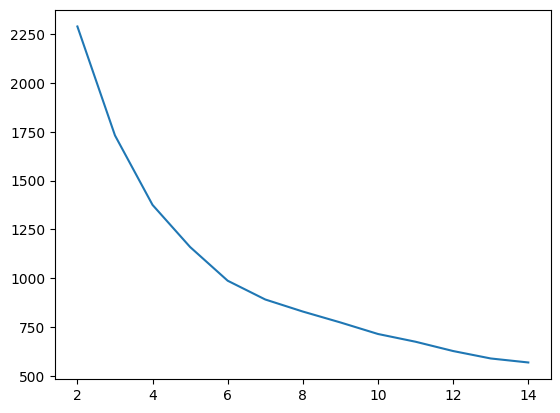

In [18]:
inertia = []
for num in range(2,15):
    classifier = KMeans(num, random_state=49).fit(user_df)
    inertia.append(classifier.inertia_)

plt.plot(list(range(2,15)), inertia)

<AxesSubplot: xlabel='frequency', ylabel='monetary'>

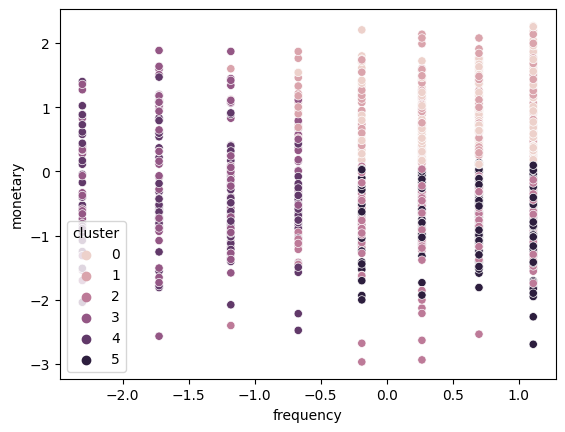

In [19]:
classifier = KMeans(6, random_state=49).fit(user_df)
user_df['cluster'] = classifier.predict(user_df)
# sns.scatterplot()
# plot_axes = plt.axes(projection = '3d')
# plot_axes.scatter3D(user_df['recency'], user_df['frequency'], user_df['monetary'])
sns.scatterplot(x = 'frequency',y = 'monetary', data = user_df, hue = 'cluster')

In [21]:
user_df.describe()

,recency,frequency,monetary,cluster
count,1.030000e+03,1.030000e+03,1.030000e+03,1030.000000
mean,1.258971e-16,-1.152045e-15,6.208626e-16,2.361165
std,1.000000e+00,1.000000e+00,1.000000e+00,1.756190
min,-1.270470e+00,-2.305483e+00,-2.969424e+00,0.000000
25%,-1.270470e+00,-6.695742e-01,-7.884073e-01,1.000000
50%,-1.176195e-01,2.675844e-01,-6.998976e-02,2.000000
75%,7.715093e-01,6.997685e-01,8.123129e-01,4.000000
max,2.188082e+00,1.110862e+00,2.265875e+00,5.000000


In [24]:
user_df.sort_values(by = 'monetary', ascending =False)

,recency,frequency,monetary,cluster
0,-1.270470,1.110862,2.265875,0
0,-0.117619,1.110862,2.253095,0
0,-1.270470,-0.187972,2.203878,0
0,0.418426,1.110862,2.196579,1
0,-0.543102,1.110862,2.187729,0
...,...,...,...,...
0,-0.543102,0.267584,-2.632702,2
0,-1.270470,-0.187972,-2.678451,2
0,0.184265,1.110862,-2.694169,5
0,-0.543102,0.267584,-2.937961,2


In [22]:
classifier.cluster_centers_

array([[-0.86085559,  0.57146083,  0.93994488],
       [ 0.90458565,  0.41040361,  0.97614401],
       [-0.92532727,  0.35067306, -0.81163808],
       [-0.64275886, -1.4599592 ,  0.01694125],
       [ 1.02977928, -1.38955628, -0.51783794],
       [ 0.68726053,  0.60550309, -0.78421948]])